Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до p-й, от p-й до 2*p-й, от 2*p-й до 3*p-й, .. .p*i-й до (i+1)*p -й,... ,от 9*p до 10*p-й точках (используйте осреденение точек, p - глубина истории, которую видим (в примере самая дальняя точка p=6))

Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_w = data.resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


C:\Users\Anatoly\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


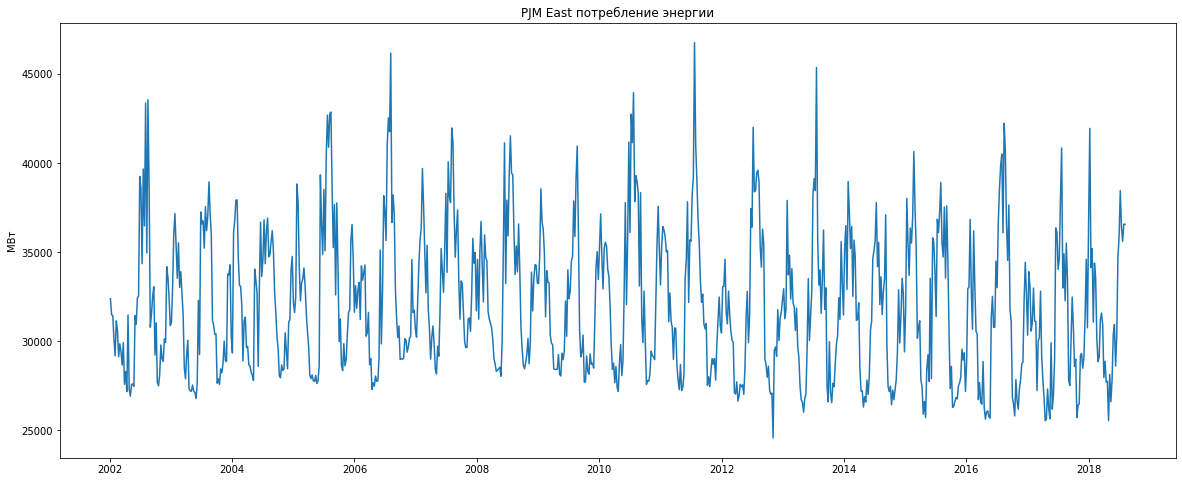

In [4]:
plt.figure(figsize = (20,8))
plt.plot(data_w['PJME_MW'])
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков 

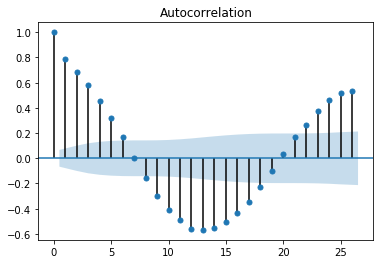

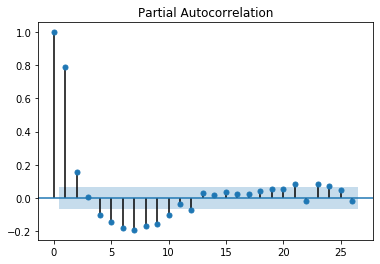

In [5]:

sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=26)
plt.show()

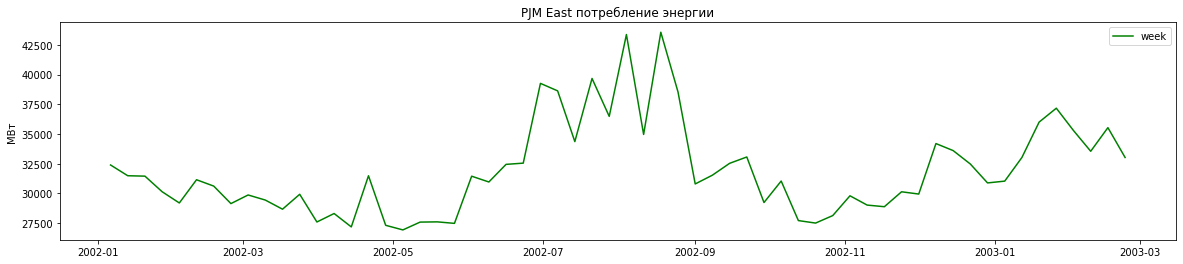

In [6]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index[:5*4*3], data_w['PJME_MW'].values[:5*4*3], 'g',label='week'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

Поскольку мы сделали ресемплинг данных по неделям, то допускаю, что можно удалить данные по дням, часам и неделям. 

In [7]:
data_w.drop(['year', 'hour', 'dayofmonth', 'dayofyear', 'dayofweek', 'is_holiday', 'is_prev_holiday', 'is_next_holiday'], axis=1,inplace=True)
data_w.head()

,PJME_MW,month,quarter,weekofyear
Date,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0
2002-01-13,31487.386905,1.000000,1.0,2.0
2002-01-20,31452.880952,1.000000,1.0,3.0
2002-01-27,30141.529762,1.000000,1.0,4.0
2002-02-03,29196.488095,1.428571,1.0,5.0


In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

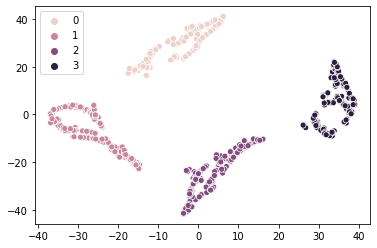

In [9]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

Отлично выделились кластеры с хорошим размещением объектов по группам. Принадлежность к кластерам можно использовать в качестве нового признака и проверить качество обработки модели с новой координатой.

In [10]:
data_w['week_month'] = X_clast
data_w.iloc[np.where(data_w['week_month']==0)[0]].iloc[:5,:]
data_w.iloc[np.where(data_w['week_month']==3)[0]].iloc[:5,:]

,PJME_MW,month,quarter,weekofyear,week_month
Date,,,,,
2002-10-06,31042.369048,9.857143,3.857143,40.0,3
2002-10-13,27714.601190,10.000000,4.000000,41.0,3
2002-10-20,27504.827381,10.000000,4.000000,42.0,3
2002-10-27,28137.335329,10.000000,4.000000,43.0,3
2002-11-03,29799.845238,10.428571,4.000000,44.0,3


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [12]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

Добавим к нашей модели 1-е разности.

In [13]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [23]:
first_diff_w =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_w).astype('float32')

Добавим логарифм признака

In [14]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

Добавим медленную экспоненциальную среднюю. 

In [17]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)

In [18]:
data_w.iloc[10:15,:]

,PJME_MW,month,quarter,weekofyear,week_month,pca1,pca2,diff1,diff1_l,exp_0_05
Date,,,,,,,,,,
2002-03-17,28672.779762,3.0,1.0,11.0,0,-1.673114,0.235380,-768.130981,10.263704,31436.852496
2002-03-24,29927.488095,3.0,1.0,12.0,0,-1.673114,0.235380,1254.708374,10.306533,31361.384276
2002-03-31,27595.869048,3.0,1.0,13.0,0,-1.673114,0.235380,-2331.619141,10.225421,31173.108514
2002-04-07,28308.778443,4.0,2.0,14.0,1,-0.819615,-0.199615,712.909424,10.250927,31029.892011
2002-04-14,27182.482143,4.0,2.0,15.0,1,-0.819615,-0.199615,-1126.296265,10.210328,30837.521517


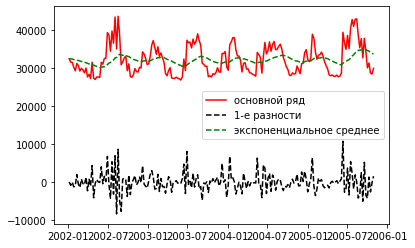

In [21]:
N1=200
plt.plot(data_w.index[:N1],data_w['PJME_MW'][:N1],'r',label ='основной ряд')
plt.plot(data_w.index[:N1],data_w['diff1'][:N1],'--k',label ='1-е разности')
plt.plot(data_w.index[:N1],data_w['exp_0_05'][:N1],'--g',label ='экспоненциальное среднее')
plt.legend()
plt.show()

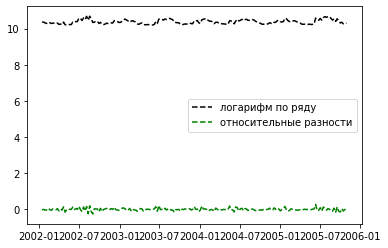

In [24]:
plt.plot(data_w.index[1:N1],data_w['diff1_l'][1:N1],'--k',label ='логарифм по ряду')

plt.plot(data_w.index[1:N1],data_w['diff1_d'][1:N1],'--g',label ='относительные разности')
plt.legend()
plt.show()

Подобных признаков можно построить бесконечное количество. Для определения разумных интервалов можно вспомнить результаты анализа ряда в статистических моделях. Период сезонных колебаний 13 недель и недельный цикл по дням. Это позволит не строить все возможные сочетания параметров модели, и сократить их число. Посмотрим на примере экспоненциальных средних в диапазоне alpha = [0.3, 0.8]

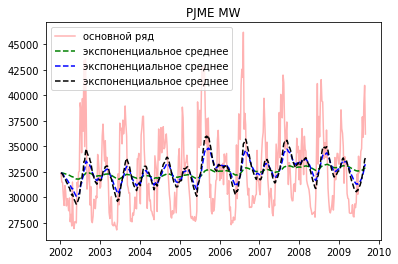

In [26]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

N1=400
plt.plot(data_w.index[:N1],data_w['PJME_MW'][:N1],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N1],data_w['exp_0_01'][:N1],'--g',label ='экспоненциальное среднее')
plt.plot(data_w.index[:N1],data_w['exp_0_05'][:N1],'--b',label ='экспоненциальное среднее')
plt.plot(data_w.index[:N1],data_w['exp_0_08'][:N1],'--k',label ='экспоненциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [27]:
data_w.iloc[:7,14]=0

Добавим истории длиной p в признаках автокорреляции

In [30]:
p = 4
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

Аналогично добавляем первые разности на глубину p

In [31]:
p = 4
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

In [33]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,week_month,pca1,pca2,diff1,diff1_l,exp_0_05,...,exp_0_07,exp_0_08,t4,t3,t2,t1,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0,-2.091617,-0.183124,0.000000,0.000000,32392.160839,...,32392.160839,32392.160839,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,1.0,2.0,0,-2.091617,-0.183124,-904.773926,10.357342,32346.922142,...,32328.826664,32319.778924,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,1.0,3.0,0,-2.091617,-0.183124,-34.505951,10.356246,32302.220083,...,32267.510464,32250.427087,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,1.0,4.0,0,-2.091617,-0.183124,-1311.351196,10.313659,32194.185567,...,32118.691815,32081.715301,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,1.0,5.0,0,-2.001938,-0.093445,-945.041687,10.281804,32044.300693,...,31914.137554,31850.897124,32392,31487,31452,30141,0,-904,-34,-1311


Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1)

In [34]:
scl_target=StandardScaler() 
# p = 4
h=4
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(858, 1)

Входной набор признаков берем из нашей таблицы. Необходимо помнить, что у нас есть интегральные признаки (для календаря), которые связаны с базовыми признаками. Обычно такие признаки рассматривают отдельно. Однако для эксперимента оставим все признаки для процедуры селекции.

In [35]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(858, 25)

In [36]:
X[:7,14]=0

Размеры выборок по строкам совпали. Мы взяли на h строк меньше для Х и на h значений позднее по target. Таким образом, входной набор данных сформирован.

In [37]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.98,  I=0
F-test=0.02,  I=1
F-test=0.03,  I=2
F-test=0.02,  I=3
F-test=0.03,  I=4
F-test=0.03,  I=5
F-test=0.00,  I=6
F-test=0.18,  I=7
F-test=1.00,  I=8
F-test=0.13,  I=9
F-test=0.18,  I=10
F-test=0.01,  I=11
F-test=0.08,  I=12
F-test=0.11,  I=13
F-test=0.13,  I=14
F-test=0.12,  I=15
F-test=0.11,  I=16
F-test=0.09,  I=17
F-test=0.00,  I=18
F-test=0.10,  I=19
F-test=0.42,  I=20
F-test=0.19,  I=21
F-test=0.23,  I=22
F-test=0.25,  I=23
F-test=0.22,  I=24


In [43]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(858, 5)

In [44]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 't1', 'd3', 'd2'], dtype='object')

In [45]:
X_new1[295:300,:]

array([[ 0.33345566,  0.39653672, -0.20377049,  0.44439189, -1.51589853],
       [ 0.29447007,  0.35807057,  0.33641365, -1.51596297, -0.86635294],
       [-0.11228268, -0.054346  ,  0.29723712, -0.86536145,  0.83278694],
       [-0.52278232, -0.49259229, -0.11009839,  0.83654059, -0.06159932],
       [-0.60635742, -0.58474359, -0.52094974, -0.0592996 , -0.63043674]])

In [46]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(858, 3)

Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [47]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 't1'], dtype='object')

Наконец, третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3. 

In [48]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(858, 5)

In [49]:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[-1.22463043, -1.30047421, -0.94109296,  0.48830944, -0.90593098],
        [-0.14573899, -0.08920457, -1.22386717, -0.90500384,  0.27481408],
        [-1.19092333, -1.25981047, -0.1434989 ,  0.27766068, -0.4383668 ],
        [-1.28807979, -1.37756698, -1.19021553, -0.43667957,  1.66780613],
        [-1.12315832, -1.17866176, -1.28740348,  1.67291721, -1.61833583]]),
 array([[-1.22463043, -1.30047421, -0.94109296],
        [-0.14573899, -0.08920457, -1.22386717],
        [-1.19092333, -1.25981047, -0.1434989 ],
        [-1.28807979, -1.37756698, -1.19021553],
        [-1.12315832, -1.17866176, -1.28740348]]),
 array([[-1.22463043, -0.75411458, -1.23952175, -1.30047421, -0.84879452],
        [-0.14573899, -0.68744479, -1.23952175, -0.08920457, -0.53334388],
        [-1.19092333, -0.620775  , -1.23952175, -1.25981047, -1.11950396],
        [-1.28807979, -0.55410521, -0.31941925, -1.37756698, -0.94028778],
        [-1.12315832, -0.48743542,  0.04862175, -1.17866176, -1.22331362]])]

Сравним результаты X_new1, X_new2, X_new3

In [50]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  8 20 22 23]
Номера признаков лучших признаков по процентной форме:  [ 0  8 20]
Номера признаков для выбора по модели :  [ 0  3  6  8 17]


Объединим признаки. Возьмем [0,6,12,14,15,22,23] признаки и перейдем к построению модели.

In [51]:
list_par=[0,3,9,17,20]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'weekofyear', 'exp_0_05', 't4', 't1'], dtype='object')

Разделим данные на тестовые и тренировочные. 

In [52]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

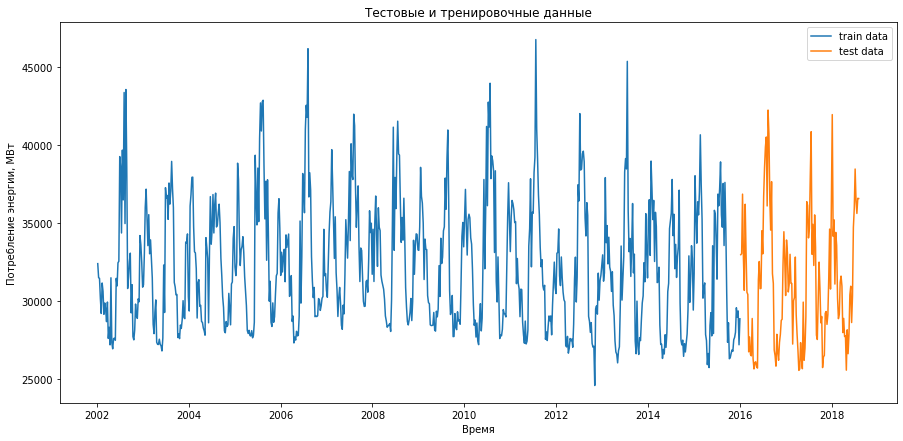

In [53]:
train, test = split_data(data_w, '01-06-2016')

plt.figure( figsize=(15, 7))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()

In [54]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [55]:
train.shape

(731, 25)

Построим модель 

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
model_grad = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [58]:
model_grad.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=0)

In [59]:
X_test.shape

(127, 5)

In [60]:
y_test_pred_grad = model_grad.predict(X_test)

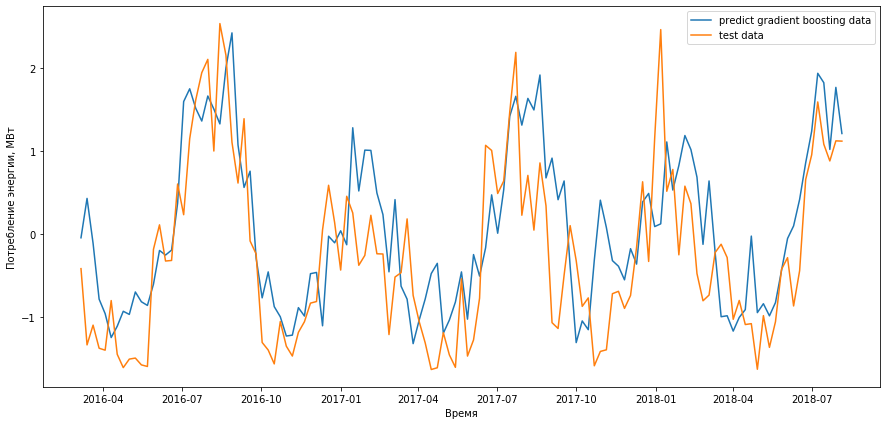

In [61]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_grad, label='predict gradient boosting data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

Используем следующие метрики для сравнения моделей регрессии: 
    - среднеквадратичное отклонение
    - среднюю абсолютную ошибку
    - коэффициент детерминации

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [63]:
er_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred_grad) 
er_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_grad) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_grad)

print('ошибка mse :  ', er_mse,'\nошибка mae  :  ', er_mae,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.6108588603701466 
ошибка mae  :   0.6334503578735323 
оценка R2 :   0.42857600735471846


Ошибка MAPE: 

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
er_grad = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_grad))

In [66]:
print('ошибка градиентного бустинга MAPE :  ', er_grad,'%')

ошибка градиентного бустинга MAPE :   8.311903307136054 %


Построим более точную модель с использованием поиска моделей.

In [70]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        parameteres = np.flatnonzero(results['rank_test_score'] == i)
        for param in parameteres:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][param],
                  results['std_test_score'][param]))
            print("Parameters: {0}".format(results['params'][param]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

C:\Users\Anatoly\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Model with rank: 1
Mean validation score: 0.625 (std: 0.042)
Parameters: {'n_estimators': 300, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.622 (std: 0.046)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.617 (std: 0.041)
Parameters: {'n_estimators': 400, 'max_depth': 2}



In [72]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=400)
model_g_best.fit(X_train, y_train ) 
y_test_pred_grad = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform( y_test_pred_grad))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.192639426493745 %


Не слишком сильно улучшили качество по метрики MAPE...

In [73]:
scl_target=StandardScaler() 
# p = 5
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(861, 1)

In [74]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(861, 25)

In [76]:
X[:7,14]=0

In [77]:
list_par=[0,3,9,17,20,22,23]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'weekofyear', 'exp_0_05', 't4', 't1', 'd3', 'd2'], dtype='object')

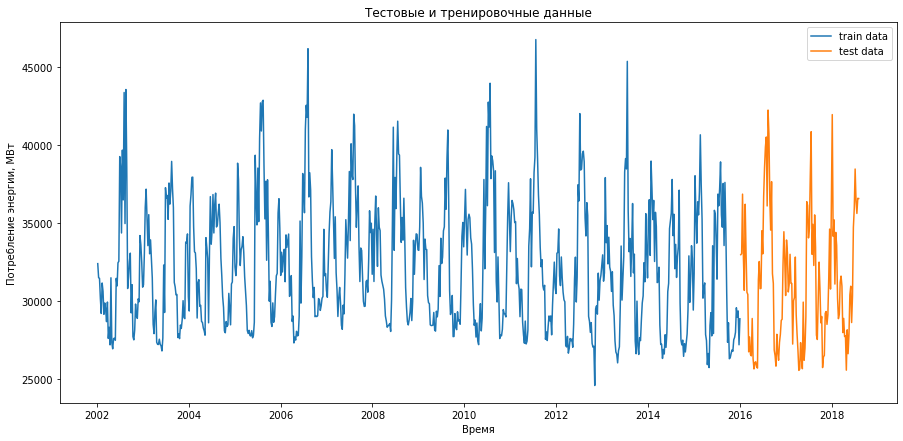

In [78]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()  

In [79]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [80]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [81]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(max_depth=5, random_state=0)

In [82]:
y_test_pred_grad = model_g.predict(X_test)

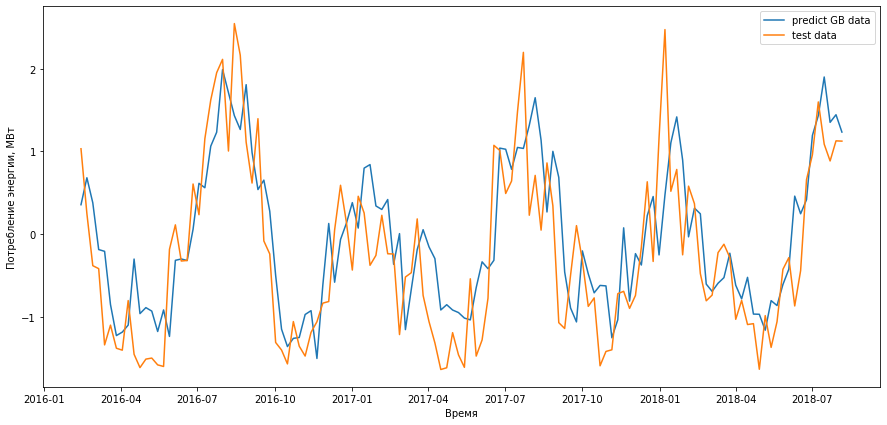

In [84]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_grad, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [86]:
er_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred_grad) 
er_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_grad) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_grad)

print('ошибка mse :  ', er_mse,'\nошибка mae  :  ', er_mae,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4526910910860345 
ошибка mae  :   0.5549263470626953 
оценка R2 :   0.5736289370576376


In [87]:
er_grad = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform(y_test_pred_grad))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.192639426493745 %


Ошибка MAPE осталась на прежнем уровне. 

In [88]:
import pickle
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model_g, open(filename, 'wb'))

filename = 'final_scaler_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

In [92]:

# ['weekofyear', 'diff1_l', 't4', 't1']
def point_range(x1, x2):
    X_test_100 = X_test.copy()
    y_test_100 = y_test_pred_grad.copy()
    N10 = 10
    for i in range(x1, x2):
        y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,7)))
        # восстанавливаем не масштабированное значение ряда текущей точке  
        y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )

        # заполняем вектор для прогноза следующей точки
        X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
        #'t4', 't1' автокорреляционные функции Признаки 2 и 3.
        X_test_100[i+1,2] = X_test_100[i-1,0]
        X_test_100[i+1,3] = X_test_100[i-4,0]
        #'d3', 'd2' автокорреляционные функции Признаки 2 и 3.
        #строим 'diff1_l' - признак под номером 1
        # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
        xy_i=(np.log((y_i))-scl_x.mean_[9])*scl_x.scale_[9]
        #устанавливаем новое значение для 4
        X_test_100[i+1,1] = xy_i 
        
    er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[x1:x2]),y_pred = scl_target.inverse_transform( y_test_100[x1:x2]))
    print(f'ошибка градиентного бустинга в диапазоне {x1} и {x2} от MAPE : {er_g} %')

In [93]:
for i in range (10, 90, 10):
    point_range(i, i+10)

ошибка градиентного бустинга в диапазоне 10 и 20 от MAPE : 12.290365634400528 %
ошибка градиентного бустинга в диапазоне 20 и 30 от MAPE : 8.672704906519654 %
ошибка градиентного бустинга в диапазоне 30 и 40 от MAPE : 19.901395537505074 %
ошибка градиентного бустинга в диапазоне 40 и 50 от MAPE : 6.3084431836590324 %
ошибка градиентного бустинга в диапазоне 50 и 60 от MAPE : 13.741014091070463 %
ошибка градиентного бустинга в диапазоне 60 и 70 от MAPE : 21.927359081772373 %
ошибка градиентного бустинга в диапазоне 70 и 80 от MAPE : 9.078049004503775 %
ошибка градиентного бустинга в диапазоне 80 и 90 от MAPE : 19.156912719316715 %


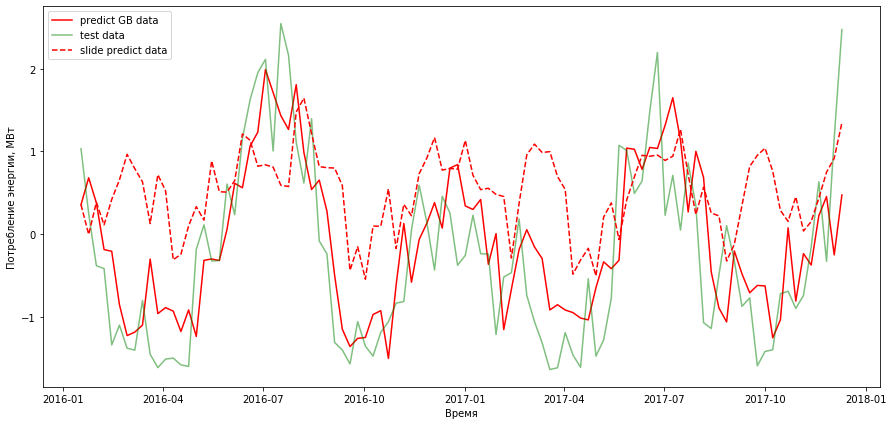

In [96]:
# ['weekofyear', 'diff1_l', 't4', 't1']
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_grad.copy()
N10 = 100
for i in range(N10):
    y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,7)))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
    #'t4', 't1' автокорреляционные функции Признаки 2 и 3.
    X_test_100[i+1,2] = X_test_100[i-1,0]
    X_test_100[i+1,3] = X_test_100[i-4,0]
    #'d3', 'd2' автокорреляционные функции Признаки 2 и 3.
    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[9])*scl_x.scale_[9]
    #устанавливаем новое значение для 4
    X_test_100[i+1,1] = xy_i 
        
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_grad[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()

Вывод: на различных участках модели разные ошибки. Модель учитывает смену тренда и запаздывает в соответствии с ней. На вершинах перехода происходит перелом и ошибка становится меньше. 